# Python for Harvesting Data on the Web

**Nicholas Wolf and Vicky Steeves, NYU Data Services**

Vicky's ORCID: 0000-0003-4298-168X | Nick's ORCID: 0000-0001-5512-6151

This work is licensed under a Creative Commons Attribution-NonCommercial 4.0 International License.

## Overview

This session is an intermediate-to-advanced level class that offers some ideas for how to approach the following common data wrangling needs in research:

 - Obtain data and load it into a suitable data "container" for analysis, often via a web interface, especially an API
 - Parse the data retrieved via an API and turn it into a useful object for manipulation and analysis
 - Perform some basic summary counts of records in a dataset and work up a quick visualization

## Setup

**Project Environment**

Download the notebook available at [https://goo.gl/DZuPim](https://goo.gl/DZuPim) and open it in Jupyter Notebook.

**State of New York Socrata API Account**

To work with this session's data, you'll need to create an API account with the state of New York's data service. Visit <a href="https://data.ny.gov">data.ny.gov</a> and click on signup to create an account.

# 1. Web Requests

It is not unusual to find open data served directly on the web, without requiring any tokens or authorizations. Although it is not often the practice to provide very large resources via such an entrypoint because of the burden it places on data servers, smaller datasets are frequently available. When it comes to such non-API generated data it is generally easier to work with services that serve the data directly in its native file format, rather than wrapping it in HTML. The latter requires you to parse first the HTML or interpret the HTTP response.

As an example, take the motor vehicle accident report <a href="https://data.ny.gov/Transportation/Motor-Vehicle-Crashes-Vehicle-Information-Three-Ye/xe9x-a24f">data found here</a>. One thousand records from this 1.65 million-record dataset can be accessed directly at <a href="https://data.ny.gov/resource/cm56-widp.json">https://data.ny.gov/resource/cm56-widp.json</a> (FYI Firefox has a nice JSON viewer built in when you encounter .json hosted files on the web.)

Let's walk through making an HTTP request for that .json data and quickly transforming it into a useful container (a Pandas dataframe) to ready it for use. We'll make use of Python's <a href="https://docs.python.org/3/library/json.html">JSON module</a>, a compact and easy-to-use way of turning JSON into Python's native object types, lists and dictionaries. If you want to anticipate what JSON input will prompt which Python object type output, see this table here: https://docs.python.org/3/library/json.html#json-to-py-table. Note that a JSON array of key-value objects will yield a Python list of dictionaries.


In [2]:
#json module in Python is really good, uses same synthax and same conventions.
#parses json files like a dictionary: json object -> dict
#requests is a nice little library, has great documentaiton and works great

import json
import requests

mv_data_json = requests.get('https://data.ny.gov/resource/cm56-widp.json')

#loading text version of the object
mv_list_recs = json.loads(mv_data_json.text)

#happens to be a list of dictionaries
print(mv_list_recs[0])

{u'contributing_factor_1_description': u'Not Entered', u'vehicle_body_type': u'UNKNOWN VEHICLE', u'event_type': u'Not Entered', u'fuel_type': u'Not Entered', u'year': u'2014', u'type_axles_of_truck_or_bus': u'Not Entered', u'action_prior_to_accident': u'Unknown', u'case_vehicle_id': u'12100031', u'direction_of_travel': u'Unknown', u'contributing_factor_2_description': u'Not Entered', u'contributing_factor_2': u'HUMAN', u'contributing_factor_1': u'HUMAN', u'registration_class': u'Not Entered'}


**Pandas**

If you haven't yet given a Pandas dataframe a try as a way to manage large arrays of information, give it a go. It <em>is</em> possible to go overboard: not everything needs to be put in a dataframe, especially when a Python list of lists or a dictionary will do. Take a look at how fast we can access subsets of the motor vehicle data.

In [3]:
import pandas as pd

#output using a nice display format of a table
from IPython.display import display

mv_df = pd.DataFrame(mv_list_recs)

display(mv_df.head(10))

,action_prior_to_accident,case_vehicle_id,contributing_factor_1,contributing_factor_1_description,contributing_factor_2,contributing_factor_2_description,direction_of_travel,engine_cylinders,event_type,fuel_type,number_of_occupants,partial_vin,registration_class,state_of_registration,type_axles_of_truck_or_bus,vehicle_body_type,vehicle_make,vehicle_year,year
0,Unknown,12100031,HUMAN,Not Entered,HUMAN,Not Entered,Unknown,NaN,Not Entered,Not Entered,NaN,NaN,Not Entered,NaN,Not Entered,UNKNOWN VEHICLE,NaN,NaN,2014
1,Slowing or Stopping,12638921,HUMAN,Unknown,HUMAN,Not Entered,South,NaN,Not Entered,Not Entered,2,NaN,Not Entered,NJ,Not Entered,TAXI,NaN,NaN,2014
2,Unknown,12011955,HUMAN,Not Entered,HUMAN,Not Entered,Unknown,NaN,Not Entered,Not Entered,NaN,NaN,Not Entered,NaN,Not Entered,UNKNOWN VEHICLE,NaN,NaN,2014
3,Unknown,12563354,HUMAN,Unknown,HUMAN,Not Entered,North,NaN,Not Entered,Not Entered,NaN,NaN,Not Entered,NaN,Not Entered,UNKNOWN VEHICLE,NaN,NaN,2014
4,Backing,12574060,HUMAN,Not Entered,HUMAN,Not Entered,Unknown,NaN,Not Entered,Not Entered,1,NaN,Not Entered,NY,Not Entered,SUBURBAN,NaN,NaN,2014
5,Going Straight Ahead,12805044,HUMAN,Not Entered,HUMAN,Not Entered,South,NaN,Not Entered,Not Entered,1,NaN,Not Entered,NaN,Not Entered,BICYCLIST,NaN,NaN,2014
6,Not Applicable,12570170,HUMAN,Not Entered,HUMAN,Not Entered,Not Applicable,NaN,Not Entered,Not Entered,NaN,NaN,Not Entered,NaN,Not Entered,PEDESTRIAN,NaN,NaN,2014
7,Going Straight Ahead,12348037,HUMAN,Driver Inattention/Distraction*,HUMAN,Not Entered,West,NaN,Not Entered,Not Entered,NaN,NaN,Not Entered,NaN,Not Entered,4 DOOR SEDAN,NaN,NaN,2014
8,Going Straight Ahead,12342595,HUMAN,Not Entered,HUMAN,Not Entered,East,NaN,Not Entered,Not Entered,4,NaN,Not Entered,NaN,Not Entered,UNKNOWN VEHICLE,NaN,NaN,2014
9,Parked,12231358,HUMAN,Not Applicable,HUMAN,Not Applicable,East,NaN,Not Applicable,Not Entered,NaN,NaN,Not Entered,AZ,Not Entered,UNKNOWN CAR,NaN,NaN,2014


In [4]:
#pandas dataframe is effectively a list of series, so Pandas can use with individual columns

print(type(mv_df.number_of_occupants))
print(type(mv_df.number_of_occupants.tolist()))

<class 'pandas.core.series.Series'>
<type 'list'>


** Bonus: wget direct from web**

If you have wget installed on your system, you can use the command line utility wget directly in a Notebook cell.

To install wget, visit [http://www.gnu.org/software/wget/](http://www.gnu.org/software/wget/)

In [5]:
#this is hurricane tracking data as an example

!wget https://www.nhc.noaa.gov/data/hurdat/hurdat2-nepac-1949-2017-050418.txt

--2018-10-16 15:32:28--  https://www.nhc.noaa.gov/data/hurdat/hurdat2-nepac-1949-2017-050418.txt
Resolving www.nhc.noaa.gov (www.nhc.noaa.gov)... 54.230.19.18, 54.230.19.80, 54.230.19.170, ...
Connecting to www.nhc.noaa.gov (www.nhc.noaa.gov)|54.230.19.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3396117 (3.2M) [text/plain]
Saving to: ‘hurdat2-nepac-1949-2017-050418.txt’

hurdat2-nepac-1949- 100%[===================>]   3.24M  18.3MB/s    in 0.2s    

2018-10-16 15:32:29 (18.3 MB/s) - ‘hurdat2-nepac-1949-2017-050418.txt’ saved [3396117/3396117]



In [6]:
with open('hurdat2-nepac-1949-2017-050418.txt') as f:
    for i in f.readlines()[0:2]:
        print(i)

EP011949,            UNNAMED,      7,

19490611, 0000,  , TS, 20.2N, 106.3W,  45, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999,



# Web API Requests

For more robust ways of serving up data, i.e. by APIs, we generally need to register an "app," i.e. an application that will be accessing the data, receive at the very least a token (and often a client secret as well) to enable tracked downloads of data, ensure proper access limits, etc.

It is very helpful if an API comes with a pre-built library to interface with that server so that you don't have to handle signing requests in HTTP, managing tokens, etc. For example, here is the typical workflow often required for authenticated API interfacing:

In [7]:
import requests
import json
from requests import Request

## This first step is just to authenticate user and receive a token (which may or may not expire) to interface
# with the API

def token_retrieve():
    authurl = 'https://TOKEN-API-RETRIEVE-URL'
    authparams = {'client_id':'CLIENT-ID',
              'response_type':'code',
              'scope':'/authenticate',
              'redirect_uri':'https://PRE-ESTABLISHED-REDIRECT-URL'
    }
    
    code_token = Request('POST', authurl, params=authparams)
    
    ## In between step above and below some kind of password authentication takes place.
    
    tokenurl = 'https://URL-TO-CONFIRM-TOKEN'
    
    head = {'content-type':'Accept: application/json'}
    params = {'client_id':'CLIENT-ID',
              'client_secret':'CLIENT-SECRET',
              'code':continput,
              'grant_type':'authorization_code',
              'redirect_uri':'https://PRE-ESTABLISHED-REDIRECT-URL'
    }

    r = requests.post(tokenurl, data=params)

    return json.loads(r.text)['access_token']

## Now that we are authenticated we can finally get the data.

def get_data(acc_token):
    baseurl = 'https://DATA-API-URL'
    head = {'Accept': 'application/vnd.orcid+json',
            'Authorization':'Bearer ' + acc_token
    }
    r = requests.get(baseurl + 'API-PARAMETERS', headers=head)
    return r.text

Each of these little mini-apps needs to be configured to work with a given API, and this hasn't even arrived at the question of how best to structure your data responses so that they are easy to work with.

Fortunately, we have a nice workable pre-made library for working with this same NY State Socrata API portal. The module is called <a href="https://github.com/xmunoz/sodapy/blob/master/examples/basic_queries.py"><pre>sodapy</pre></a>

We'll need to install it:

<pre>pip install sodapy</pre>

or

<pre>easy_install sodaypy</pre>

or

<pre>conda install sodapy</pre>

**Web API Access with Prebuilt Library**

Helpfully, this sodapy has a nice means of working specifically with the NY State Socrata platform. Once you have sodapy installed, you'll need to click on the large "Sign up for an app token!" button here: https://dev.socrata.com/foundry/data.ny.gov/cm56-widp. Or you can select create a new application and begin registering your API retriever via your State Gov dashboard.

One you have created an App, copy and paste the App token somewhere for the next step.


In [10]:
import sodapy

from sodapy import Socrata

client = Socrata('data.ny.gov','NgTQWcX1J00iuyx5Wx884Qdd2',
                username='eb3237@nyu.edu',
                password='NYsambo2017')

results = client.get('cm56-widp', limit=200000)

ImportError: No module named sodapy

In [ ]:
results_df = pd.DataFrame.from_records(results)
display(results_df.head(10))

In [14]:
mv_df.head()

,action_prior_to_accident,case_vehicle_id,contributing_factor_1,contributing_factor_1_description,contributing_factor_2,contributing_factor_2_description,direction_of_travel,engine_cylinders,event_type,fuel_type,number_of_occupants,partial_vin,registration_class,state_of_registration,type_axles_of_truck_or_bus,vehicle_body_type,vehicle_make,vehicle_year,year
0,Unknown,12100031,HUMAN,Not Entered,HUMAN,Not Entered,Unknown,NaN,Not Entered,Not Entered,NaN,NaN,Not Entered,NaN,Not Entered,UNKNOWN VEHICLE,NaN,NaN,2014
1,Slowing or Stopping,12638921,HUMAN,Unknown,HUMAN,Not Entered,South,NaN,Not Entered,Not Entered,2,NaN,Not Entered,NJ,Not Entered,TAXI,NaN,NaN,2014
2,Unknown,12011955,HUMAN,Not Entered,HUMAN,Not Entered,Unknown,NaN,Not Entered,Not Entered,NaN,NaN,Not Entered,NaN,Not Entered,UNKNOWN VEHICLE,NaN,NaN,2014
3,Unknown,12563354,HUMAN,Unknown,HUMAN,Not Entered,North,NaN,Not Entered,Not Entered,NaN,NaN,Not Entered,NaN,Not Entered,UNKNOWN VEHICLE,NaN,NaN,2014
4,Backing,12574060,HUMAN,Not Entered,HUMAN,Not Entered,Unknown,NaN,Not Entered,Not Entered,1,NaN,Not Entered,NY,Not Entered,SUBURBAN,NaN,NaN,2014


## Challenge

What if we need to know if a column's values are unique? In the motor vehicle dataframe, for example, what if we suspect that case_vehicle_id is nonunique but should be? How can we check it?

Answer: can do frequency counts on ID; or the following - call the case vechicle ID column and convert to a list; look at a set version of a list. If this is true then both of the below outputs should be the same. 

In [16]:
# Maybe try pulling the values as a list, and then either checking if it contains duplicates or enumerating it:

list_vals = mv_df.case_vehicle_id.tolist()

print(len(list_vals))
print(len(set(list_vals)))

1000
1000


In [17]:
#  OR

from collections import Counter

# This produces a dictionary with each key consisting of value from a list and its value the number of occurrences
enum_list = Counter(list_vals)

for val in enum_list:
    if enum_list[val] > 1:
        print(val)

**Quick Frequency Counts on a Subset of Data**

If we are interested in, say, the counts of each state to which a vehicle involved in an incident was registered, we can do this quickly in Pandas using a groupby function and summing up counts of those grouped common values. 

Let's also address that NULL value problem:

In [18]:
state_df = mv_df.dropna(axis=0, how = "any", subset=["state_of_registration"])

# Two ways to get counts:

state_df.state_of_registration.value_counts()

state_df.groupby('state_of_registration').size()

state_of_registration
AL      2
AZ     11
CA      3
CO      1
CT     36
DE      4
FL     30
GA      6
IL      8
IN      2
MA     14
MD      8
ME      2
MI      3
MN      2
MO      1
MT      1
NC     11
ND      1
NJ     76
NT      1
NV      2
NY    181
OH      8
OK      5
ON      3
OR      1
OT      3
PA     58
QC      1
RI      1
SC     12
SD      1
TN      5
TX      3
US      1
VA     14
VT      5
WA      1
WI      1
ZS      1
dtype: int64

We can do the same to discover typical numbers of occupants in vehicles:


In [19]:
layer_df = mv_df.dropna(axis=0, how='any',
                            subset=['action_prior_to_accident',
                                   'number_of_occupants']).groupby(['action_prior_to_accident',
                                                                  'number_of_occupants']).size()

display(layer_df)

action_prior_to_accident    number_of_occupants
Avoiding Object in Roadway  1                        1
                            2                        1
Backing                     1                       22
                            2                        5
                            3                        1
                            4                        1
Changing Lanes              1                        6
                            4                        2
                            5                        1
Entering Parked Position    1                        2
                            5                        1
Going Straight Ahead        1                      208
                            11                       1
                            2                       46
                            3                       11
                            4                        5
                            5                        4
                 

## Easy Plots

Finally, let's look at putting this all together with the quick matplot visualization capabilities that work really well in Jupyter Notebook and even integrate nicely with Pandas.

Let's work with the water use data provided by NYC's open data portal. Now we are working on the city level and not the state: <a href="https://data.cityofnewyork.us/Environment/Water-Consumption-In-The-New-York-City/ia2d-e54m">Water consumption data from the NYC Open Data portal</a>. Preview the JSON version <a href="https://data.cityofnewyork.us/api/views/ia2d-e54m/rows.json?accessType=DOWNLOAD">here</a>.

Our workflow is the same: pull the data in JSON format from the web download, turn it into a dataframe, and then visualize.

Note the plotting library we pull in, plus a means (via a magic command) to display the visualization in-line.

In [12]:
import requests
import matplotlib.pyplot as plt

%matplotlib inline

#pull the data through request
water_data = requests.get('https://data.cityofnewyork.us/api/views/ia2d-e54m/rows.json?accessType=DOWNLOAD')


water_dictionary = json.loads(water_data.text)

#take it and parse out before we put it as dataframe; first create as empty list

full_data = []

for row in water_dictionary['data']:
    full_data.append(row)
    
col_names = [col_info['name'] for col_info in water_dictionary['meta']['view']['columns']]

water_df = pd.DataFrame(full_data, columns = col_names)

#then we display
display(water_df)

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,Year,New York City Population,NYC Consumption(Million gallons per day),Per Capita(Gallons per person per day)
0,1,9E14AE43-2562-4855-A324-4002CF8AE8BE,1,1525190137,399231,1525190137,399231,None,1979,7102100,1512,213
1,2,30845144-92B9-42DB-8247-05C91DDE1395,2,1525190137,399231,1525190137,399231,None,1980,7071639,1506,213
2,3,F8E5FEF2-73D4-4EA7-A144-2AC2803F2BC3,3,1525190137,399231,1525190137,399231,None,1981,7089241,1309,185
3,4,19F8B56B-F768-48CE-B125-454AB9D0601A,4,1525190137,399231,1525190137,399231,None,1982,7109105,1382,194
4,5,FDA85AB9-3C0C-4FA8-A7E8-FB03B580AED1,5,1525190137,399231,1525190137,399231,None,1983,7181224,1424,198
5,6,2994DEE0-DEDC-48A9-B0A2-3BE1D7D53822,6,1525190137,399231,1525190137,399231,None,1984,7234514,1465,203
6,7,75C0BA2B-D001-47EC-9B70-FB55BB12EFF5,7,1525190137,399231,1525190137,399231,None,1985,7274054,1326,182
7,8,EE14D79C-85B5-4839-AD52-1C211D38EC4F,8,1525190137,399231,1525190137,399231,None,1986,7319246,1351,185
8,9,EF203193-BCF1-444C-823E-00107A73F7BE,9,1525190137,399231,1525190137,399231,None,1987,7342476,1447,197
9,10,D6A58243-0166-4C4A-8C72-B1669E96DA82,10,1525190137,399231,1525190137,399231,None,1988,7353719,1484,202


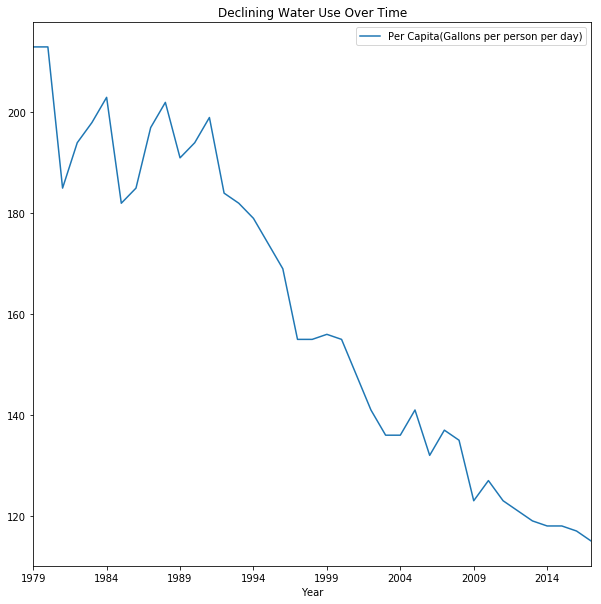

In [21]:
#turn the last two columns in float for the purpose of plotting

water_df[['NYC Consumption(Million gallons per day)','Per Capita(Gallons per person per day)']] = \
    water_df[['NYC Consumption(Million gallons per day)','Per Capita(Gallons per person per day)']].astype(float)

    
#ax = water_df.plot(x='Year', y='Per Capita(Gallons per person per day)', 
              #figsize=(10,10), title='Declining Water Use Over Time')
#ax.set_xlabel('Year')
#ax.set_ylabel('Per Capita Consumption in Gallons')
#plt.show()

#then lets plot!
water_df.plot(x='Year', y='Per Capita(Gallons per person per day)', figsize=(10,10), 
              title='Declining Water Use Over Time')

## Challenge
 
Try making a new plot that only displays the years 1990 onward.
 

In [23]:
post_1990_df = water_df[water_df.Year > 1989]

In [24]:
post_1990_df = water_df[['Per Capita(Gallons per person per day)','Year']].astype(float)
post_1990_df.head()

,Per Capita(Gallons per person per day),Year
0,213.0,1979.0
1,213.0,1980.0
2,185.0,1981.0
3,194.0,1982.0
4,198.0,1983.0


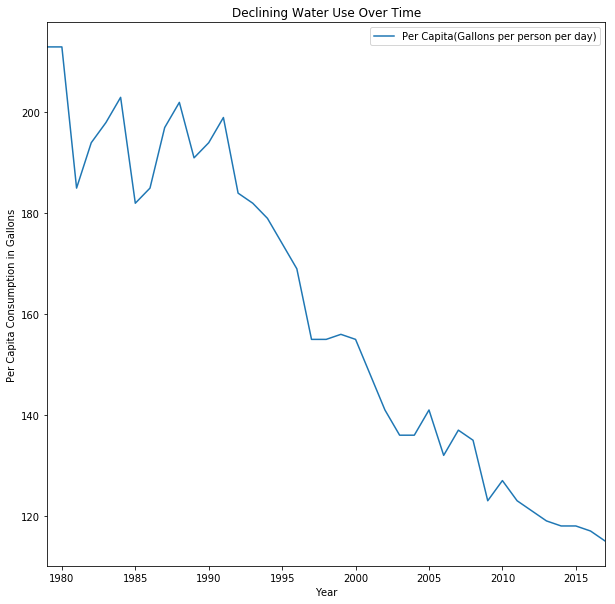

In [25]:
ax = post_1990_df.plot(x='Year', y='Per Capita(Gallons per person per day)', 
              figsize=(10,10), title='Declining Water Use Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Per Capita Consumption in Gallons')
plt.show()
